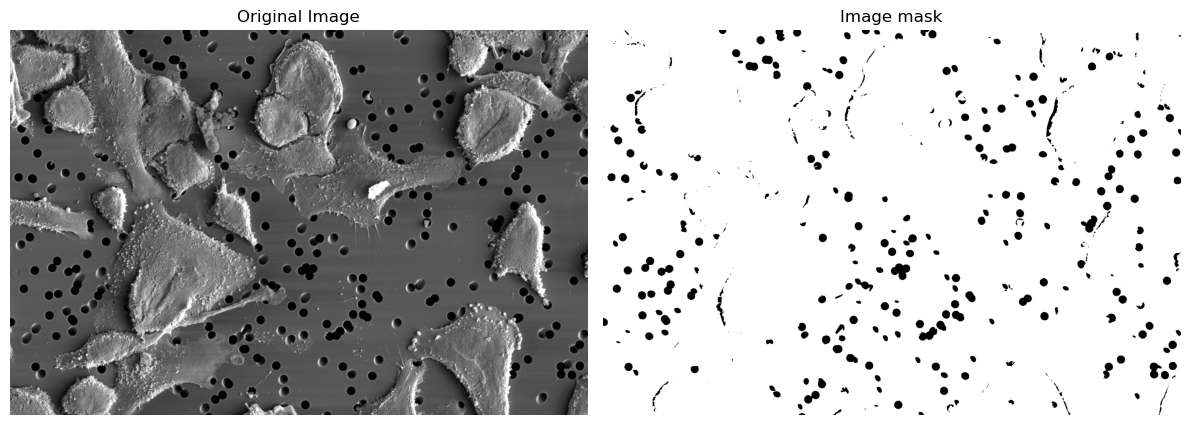

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, color
from skimage.filters import threshold_otsu
from skimage.morphology import binary_opening, disk
from skimage import io, color, filters, morphology, img_as_ubyte

# Step 1: Read the TIFF image
image_path = "C:/Users/aksha/Downloads/Untreated_TJ_101020204_16.tif"  # Change this to your file path
image = io.imread(image_path)

# Step 2: Convert to grayscale if it's a colored image
if len(image.shape) == 3: 
    image_gray = color.rgb2gray(image)
else:
    image_gray = image
image_gray = image_gray[:1024,:]
# Step 3: Apply a triangular filter from skimage
triangular_threshold = filters.threshold_minimum(image_gray, nbins=230)

# Step 4: Create a binary mask based on the minimum threshold
mask = image_gray > triangular_threshold


# Step 5: Display the original image and the mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Image mask')
plt.axis('off')



plt.tight_layout()
plt.show()
print(img_as_ubyte(mask))


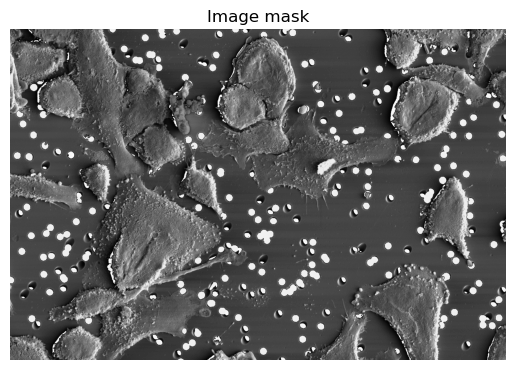

In [3]:
subtracted_image = image_gray - mask
plt.imshow(subtracted_image, cmap='gray')
plt.title('Image mask')
plt.axis('off')
plt.show()

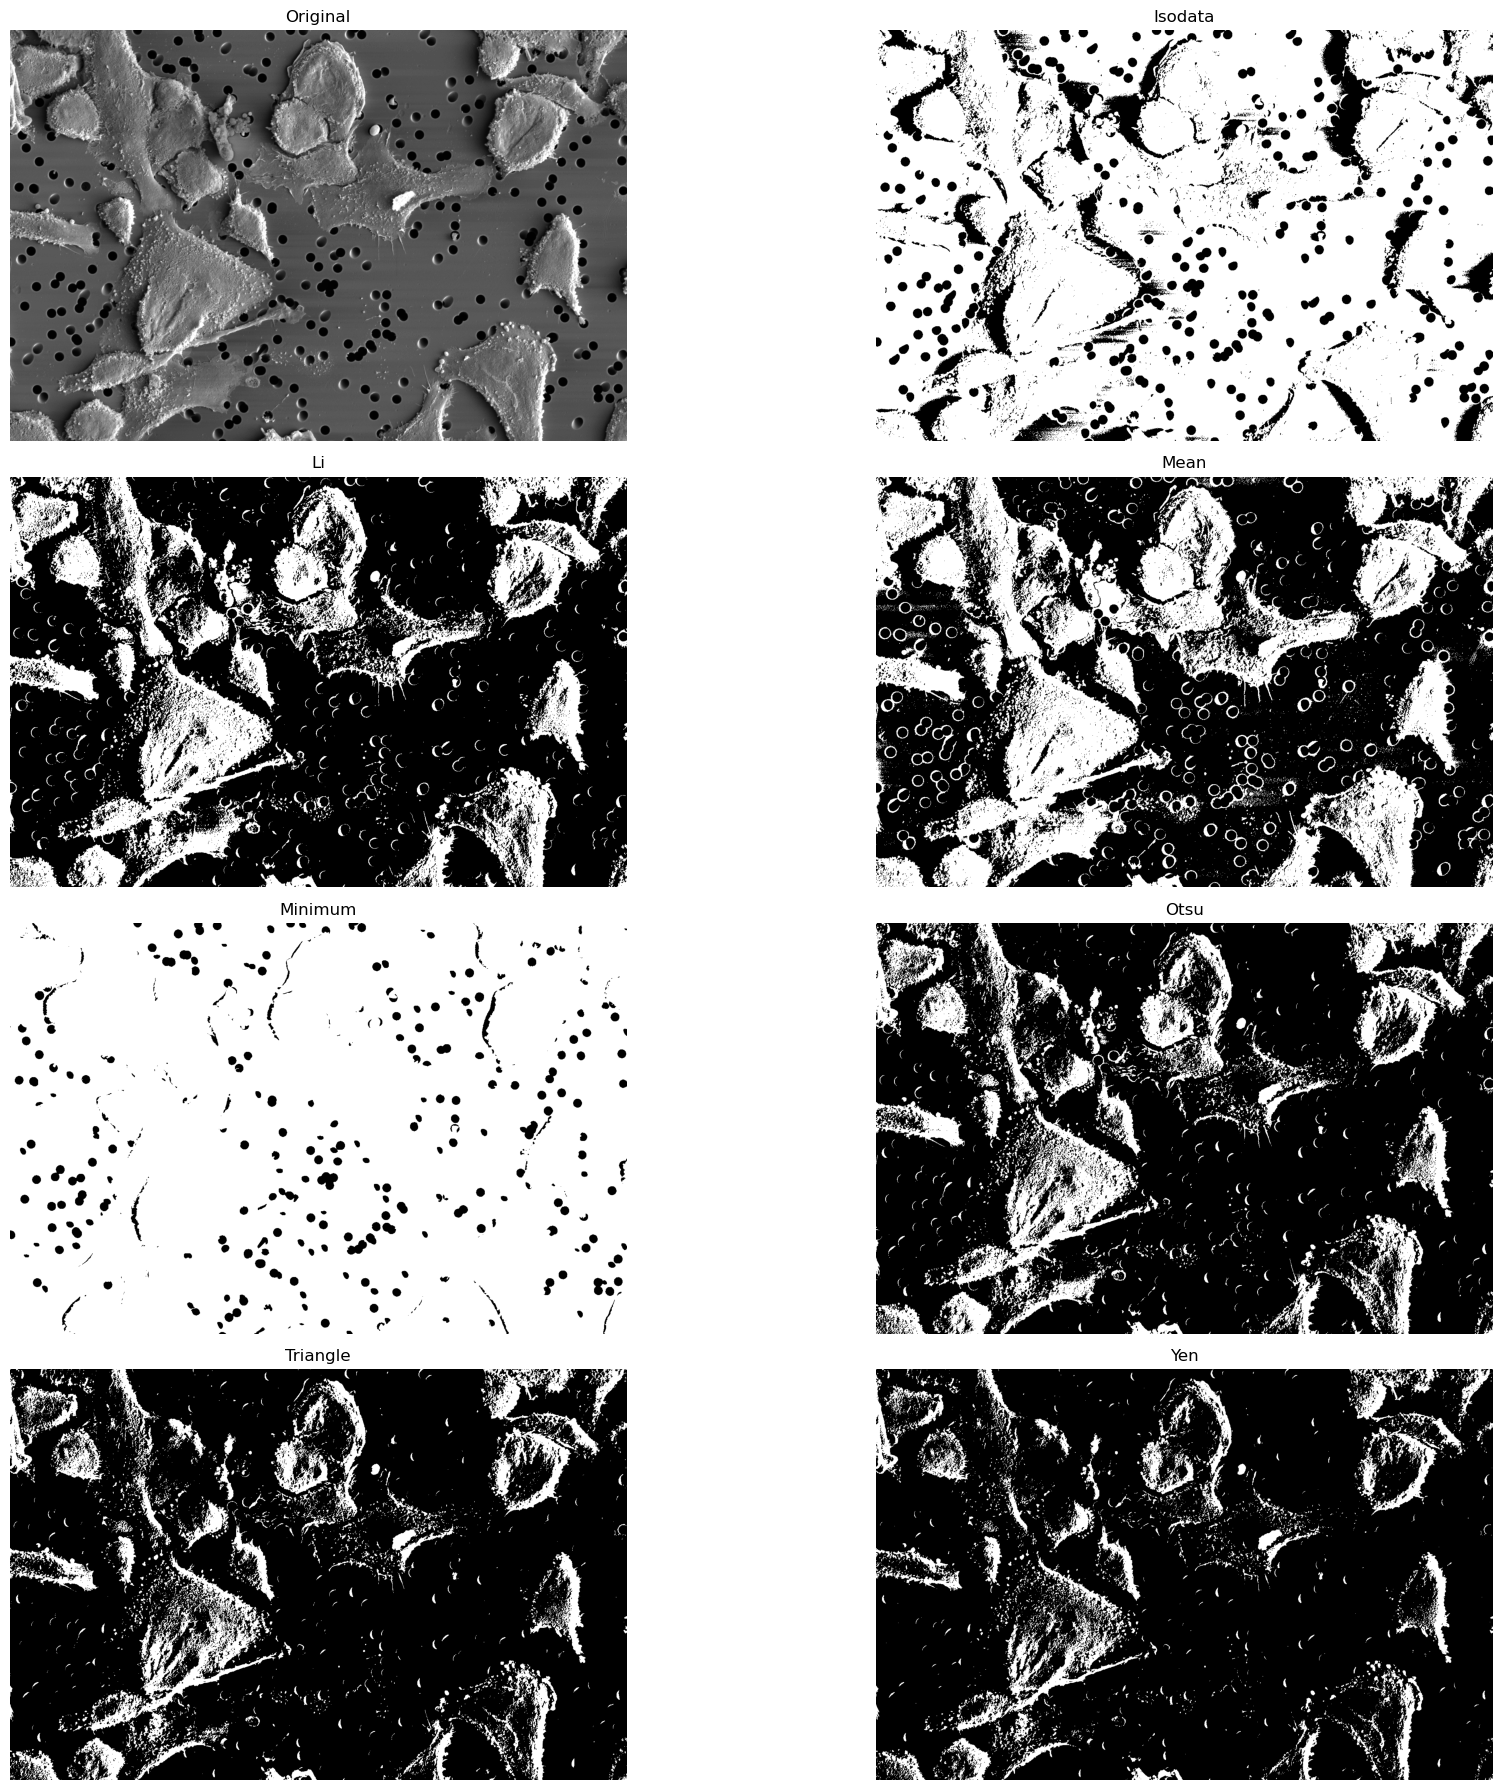

In [4]:
from skimage.filters import try_all_threshold

img = image_gray
fig, ax = try_all_threshold(img, figsize=(20, 18), verbose=False)
plt.show()

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage import io, color, feature, filters, draw, exposure
# from skimage.transform import hough_circle, hough_circle_peaks

# # Step 1: Load the image
# image_path = "C:/Users/aksha/Downloads/Untreated_TJ_101020204_16.tif"  # Change this to your image file path
# image = io.imread(image_path)
# image = image[:1024, :]

# # Step 2: Convert to grayscale
# gray_image = color.rgb2gray(image)


# # Step 3: Apply Gaussian filter to smooth the image
# smoothed_image = filters.gaussian(gray_image, sigma=2)

# # Step 4: Detect edges using the Canny edge detector
# edges = feature.canny(smoothed_image, sigma=3)

# # Step 5: Define the radius range for small circles
# radii = np.arange(10, 60, 1)  # Adjust this range for small circles

# # Step 6: Perform Hough Circle Transform
# hough_res = hough_circle(edges, radii)

# # Step 7: Find the peaks in the Hough transform
# accum, cx, cy, radii = hough_circle_peaks(hough_res, radii, threshold=0.5)

# # Step 8: Plot the original image and the detected circles
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
# ax.imshow(image, cmap='gray')
# for center_y, center_x, radius in zip(cy, cx, radii):
#     # Draw the circles
#     circ = plt.Circle((center_x, center_y), radius, color='red', linewidth=2, fill=False)
#     ax.add_patch(circ)

# ax.set_title('Detected Small Circles')
# plt.axis('off')
# plt.show()


In [6]:
print(mask)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [7]:
# import cv2
# import numpy as np

# image_int = img_as_ubyte(image_gray)
# mask_new = img_as_ubyte(mask)-255

# # Apply inpainting to fill the holes
# filled_img = cv2.inpaint(image_int, mask_new, 30, cv2.INPAINT_TELEA)



# # Display the original and processed images using matplotlib
# plt.figure(figsize=(10, 5))

# # Original image
# plt.subplot(1, 2, 1)
# plt.imshow(image_int, cmap='gray')
# plt.title("Original Image")
# plt.axis('off')

# # Processed image with circular kernel
# plt.subplot(1, 2, 2)
# plt.imshow(filled_img, cmap='gray')
# plt.title("Processed Image with Circular Kernel")
# plt.axis('off')

# plt.show()


In [10]:
import cv2
import numpy as np
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

# Assuming `image_gray` and `mask` are already loaded as grayscale images.

# Convert both the image and the mask to uint8 format
image_int = img_as_ubyte(image_gray)

# Convert the mask to binary (0 or 255) and then invert it
mask_new = img_as_ubyte(mask) - 255

# # Perform dilation on the mask to expand the holes
# kernel_size = 7  # Adjust kernel size for stronger/weaker dilation
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
# dilated_mask = cv2.dilate(mask_new, kernel, iterations=1)

# # Apply inpainting to fill the holes
# filled_img = cv2.inpaint(image_int, dilated_mask, 10, cv2.INPAINT_TELEA)
# # Save the filled image using matplotlib
# output_path = 'filled_image.png'  # Specify the path to save the image
# plt.imsave(output_path, filled_img, cmap='gray')  # Save filled image


# # Display the original and processed images using matplotlib
# plt.figure(figsize=(10, 5))

# # Original image
# plt.subplot(1, 2, 1)
# plt.imshow(image_gray, cmap='gray')
# plt.title("Original Image")
# plt.axis('off')

# # Inpainted image
# plt.subplot(1, 2, 2)
# plt.imshow(filled_img, cmap='gray')
# plt.title("Inpainted Image after Dilation")
# plt.axis('off')

# plt.show()


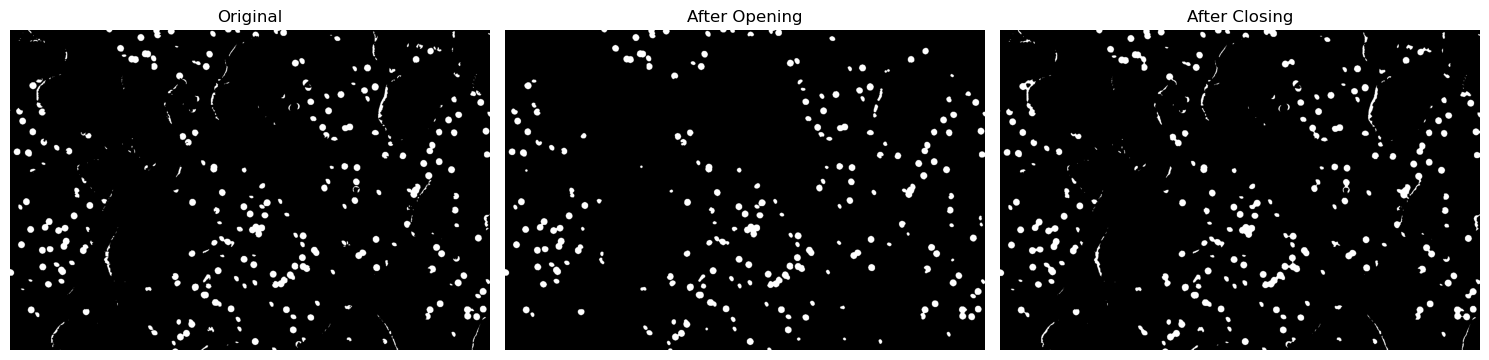

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology
from skimage.color import rgb2gray

binary = mask_new

# Define structuring element
selem = morphology.disk(4)  # Adjust the radius as needed

# Perform opening
opened = morphology.opening(binary, selem)
plt.imsave("original_mask.png", binary, cmap="gray")
plt.imsave("opened.png", opened, cmap='gray')

# Perform closing
closed = morphology.closing(binary, selem)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(binary, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(opened, cmap='gray')
ax[1].set_title('After Opening')

ax[2].imshow(closed, cmap='gray')
ax[2].set_title('After Closing')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

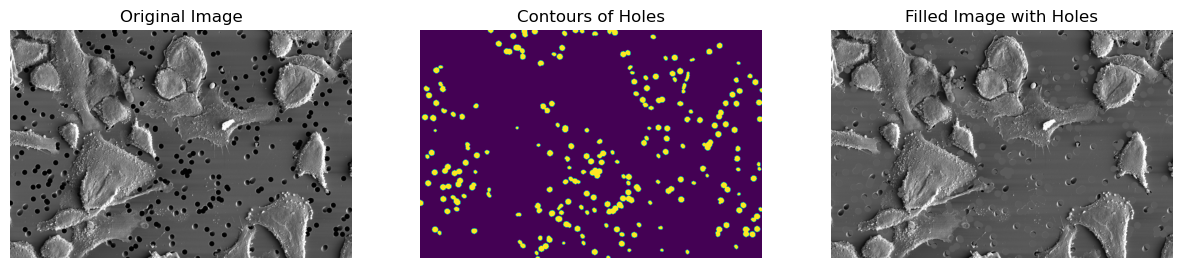

In [12]:
fill_color = (91, 91, 91)  # BGR format
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image and the binary mask
original_image = image_int


kernel_size = 7  # Adjust kernel size for stronger/weaker dilation
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
dilated_mask = cv2.dilate(opened, kernel, iterations=1)
binary_mask = dilated_mask

# Specify the fill color in BGR format
fill_color = (91, 91, 91)  # Gray color

# Create a colored version of the original image
colored_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Find contours of the black holes in the binary mask
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw contours
contour_image = colored_image.copy()

# Draw contours on the contour image
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), thickness=2)  # Blue color for contours

# Fill the detected holes with the specified color
cv2.drawContours(colored_image, contours, -1, fill_color, thickness=cv2.FILLED)
output_path = 'contour.png'  # Specify the path to save the image
plt.imsave(output_path, colored_image, cmap='gray')  # Save filled image
# Display the original, contours, and filled images using matplotlib
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Contour image
plt.subplot(1, 3, 2)
plt.imshow(dilated_mask)
plt.title("Contours of Holes")
plt.axis('off')

# Filled image
plt.subplot(1, 3, 3)
plt.imshow(colored_image)
plt.title("Filled Image with Holes")
plt.axis('off')

plt.show()


In [1]:
import os
import numpy as np
import cv2
from skimage import io, filters, color, morphology, img_as_ubyte
import matplotlib.pyplot as plt
from pathlib import Path

def process_image(image_path):
    """
    Process a single image to remove artifacts and fill holes.
    Returns a grayscale image.
    """
    # Step 1: Read the image
    image = io.imread(image_path)
    
    # Step 2: Convert to grayscale if it's a colored image
    if len(image.shape) == 3:
        image_gray = color.rgb2gray(image)
    else:
        image_gray = image
    
    # Crop image if needed
    image_gray = image_gray[:1024,:] if image_gray.shape[0] > 1024 else image_gray
    
    # Step 3: Apply triangular filter
    triangular_threshold = filters.threshold_minimum(image_gray)
    
    # Step 4: Create binary mask
    mask = image_gray > triangular_threshold
    
    # Convert to uint8 format
    image_int = img_as_ubyte(image_gray)
    mask_new = img_as_ubyte(mask) - 255
    
    # Morphological operations
    selem = morphology.disk(4)
    opened = morphology.opening(mask_new, selem)
    
    # Dilate the mask
    kernel_size = 7
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    dilated_mask = cv2.dilate(opened, kernel, iterations=1)
    
    # Create a grayscale output image
    processed_image = image_int.copy()
    
    # Fill holes with specified grayscale value
    fill_value = 91  # Using the same value as before but as grayscale
    contours, _ = cv2.findContours(dilated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(processed_image, contours, -1, fill_value, thickness=cv2.FILLED)
    
    return processed_image, dilated_mask

def batch_process_images(input_folder, output_folder):
    """
    Process all images in the input folder and save results to output folder.
    """
    # Create output folders if they don't exist
    output_processed = Path(output_folder) / 'processed'
    output_masks = Path(output_folder) / 'masks'
    
    for folder in [output_processed, output_masks]:
        folder.mkdir(parents=True, exist_ok=True)
    
    # Supported image extensions
    supported_extensions = ['.tif', '.tiff', '.png', '.jpg', '.jpeg']
    
    # Process each image in the input folder
    input_files = [f for f in Path(input_folder).glob('*') 
                  if f.suffix.lower() in supported_extensions]
    
    total_files = len(input_files)
    print(f"Found {total_files} images to process")
    
    for idx, input_path in enumerate(input_files, 1):
        try:
            print(f"Processing image {idx}/{total_files}: {input_path.name}")
            
            # Process the image
            processed_image, mask = process_image(str(input_path))
            print(f"Processed image shape: {processed_image.shape}")
            
            # Generate output filenames
            output_filename = input_path.stem + '_processed' + '.tif'  # Changed to .tif for better grayscale support
            mask_filename = input_path.stem + '_mask' + '.tif'
            
            # Save processed image and mask using cv2.imwrite for better grayscale handling
            cv2.imwrite(str(output_processed / output_filename), processed_image)
            cv2.imwrite(str(output_masks / mask_filename), mask.astype(np.uint8) * 255)
            
            print(f"Saved processed image and mask for {input_path.name}")
            
        except Exception as e:
            print(f"Error processing {input_path.name}: {str(e)}")
    
    print("\nBatch processing complete!")
    print(f"Processed images saved to: {output_processed}")
    print(f"Mask images saved to: {output_masks}")

# Example usage
if __name__ == "__main__":
    input_folder = "C:/Users/aksha/Peeples_Lab/SEM_Images_Lacunarity/Image_Crop/1200x images"
    output_folder = "C:/Users/aksha/Peeples_Lab/SEM_Images_Lacunarity/Image_Crop/1200x images/1200x images_processed"
    
    batch_process_images(input_folder, output_folder)

Found 16 images to process
Processing image 1/16: Untreated_TJ_101020204_01.tif
Processed image shape: (1024, 1536)
Saved processed image and mask for Untreated_TJ_101020204_01.tif
Processing image 2/16: Untreated_TJ_101020204_02.tif
Processed image shape: (1024, 1536)
Saved processed image and mask for Untreated_TJ_101020204_02.tif
Processing image 3/16: Untreated_TJ_101020204_03.tif
Processed image shape: (1024, 1536)
Saved processed image and mask for Untreated_TJ_101020204_03.tif
Processing image 4/16: Untreated_TJ_101020204_04.tif
Processed image shape: (1024, 1536)
Saved processed image and mask for Untreated_TJ_101020204_04.tif
Processing image 5/16: Untreated_TJ_101020204_05.tif
Processed image shape: (1024, 1536)
Saved processed image and mask for Untreated_TJ_101020204_05.tif
Processing image 6/16: Untreated_TJ_101020204_06.tif
Processed image shape: (1024, 1536)
Saved processed image and mask for Untreated_TJ_101020204_06.tif
Processing image 7/16: Untreated_TJ_101020204_07.